# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
#Type your code here
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



Dataset Loaded Successfully!
  ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                         

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [59]:
#Type your code here
# Set display options for better readability (optional)
pd.set_option('display.max_columns', None)

# Load the dataset
file_path = "/content/marketing_campaign.csv"
data_v1 = pd.read_csv(file_path)

# Display the first few rows to understand the dataset
print("Dataset Loaded Successfully!")
print(data_v1.head())

Dataset Loaded Successfully!
  ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                         

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [73]:
#Type your code here
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the clustering result dataset
clustering_result_file = "/content/marketing_campaign.csv"

# Baca file CSV dengan delimiter tab (\t)
data_v1 = pd.read_csv(file_path, sep='\t')

# VISUALISASI DATA
# Menghitung jumlah variabel
num_vars = data_v1.shape[1]

# Identify columns with string data type
string_columns = data_v1.select_dtypes(include=['object']).columns

# Display the first few rows to understand the dataset
print("Dataset Loaded Successfully!")
print(data_v1.head())

# Lakukan One-Hot Encoding untuk kolom 'Marital_Status'
data_v1 = pd.get_dummies(data_v1, columns=['Marital_Status'], prefix='Marital')

# Lakukan One-Hot Encoding untuk kolom 'Education'
data_v1 = pd.get_dummies(data_v1, columns=['Education'], prefix='Education')

# Convert True/False to 1/0 in the relevant columns
for column in data_v1.select_dtypes(include=['bool']).columns:
    data_v1[column] = data_v1[column].astype(int)  # Convert True to 1, False to 0

# Tampilkan beberapa baris pertama dari data yang telah di-encode
print(data_v1.head())




Dataset Loaded Successfully!
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProd

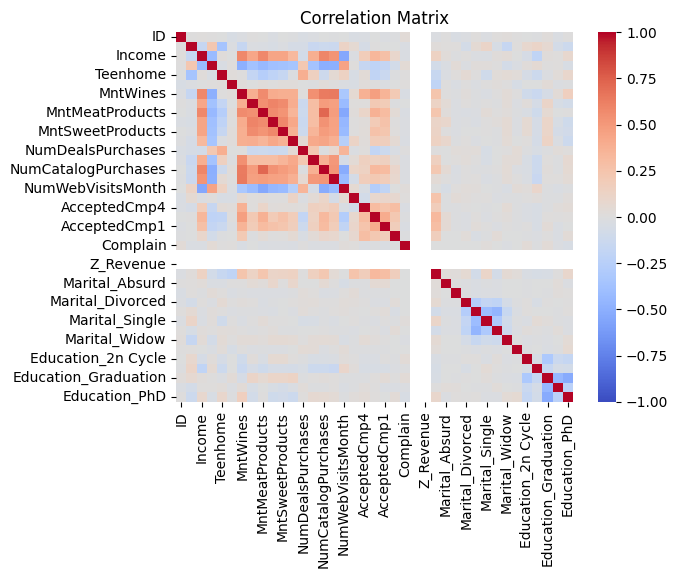

In [74]:
# Now, proceed with the correlation calculation:
correlation_columns = data_v1.select_dtypes(include=['number', 'int64']) # int64 now includes the converted dummies
correlation_matrix = correlation_columns.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [77]:
#Type your code here
# Tampilkan nama kolom untuk memverifikasi
print(data_v1.columns)

#evaluasi data
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = data_v1.isnull().sum()
missing_values[missing_values > 0]

# Baca file CSV dengan delimiter tab (\t)
data_v1 = pd.read_csv(file_path, sep='\t')

# VISUALISASI DATA
# Menghitung jumlah variabel
num_vars = data_v1.shape[1]

# Identify columns with string data type
string_columns = data_v1.select_dtypes(include=['object']).columns

# Display the first few rows to understand the dataset
print("Dataset Loaded Successfully!")
print(data_v1.head())

# Lakukan One-Hot Encoding untuk kolom 'Marital_Status'
data_v1 = pd.get_dummies(data_v1, columns=['Marital_Status'], prefix='Marital')

# Lakukan One-Hot Encoding untuk kolom 'Education'
data_v1 = pd.get_dummies(data_v1, columns=['Education'], prefix='Education')

# Convert True/False to 1/0 in the relevant columns
for column in data_v1.select_dtypes(include=['bool']).columns:
    data_v1[column] = data_v1[column].astype(int)  # Convert True to 1, False to 0

# Tampilkan beberapa baris pertama dari data yang telah di-encode
print(data_v1.head())


Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Marital_Absurd',
       'Marital_Alone', 'Marital_Divorced', 'Marital_Married',
       'Marital_Single', 'Marital_Together', 'Marital_Widow', 'Marital_YOLO',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD'],
      dtype='object')
Dataset Loaded Successfully!
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  463

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

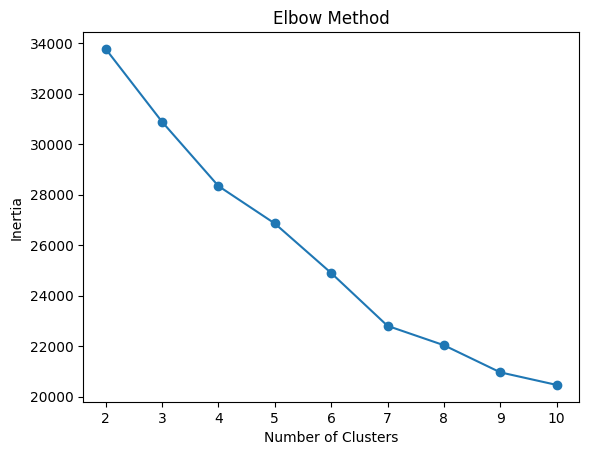

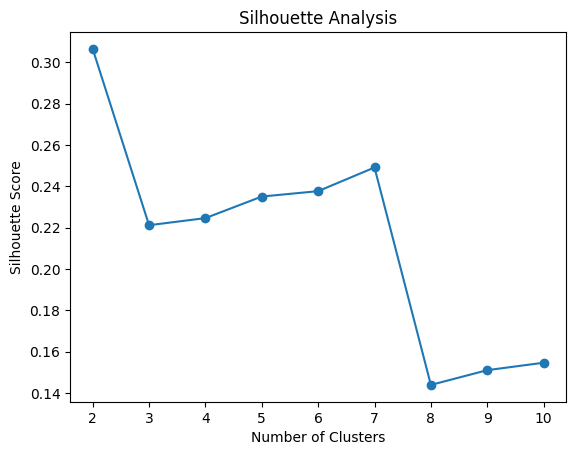

     ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  04-09-2012       58   
1  2174        1954  46344.0        1         1  08-03-2014       38   
2  4141        1965  71613.0        0         0  21-08-2013       26   
3  6182        1984  26646.0        1         0  10-02-2014       26   
4  5324        1981  58293.0        1         0  19-01-2014       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88       

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menghapus baris yang mengandung setidaknya satu NaN
data_v1 = data_v1.dropna()

# Pilih fitur untuk clustering (sesuaikan dengan EDA)
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
            'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
            'Z_CostContact', 'Z_Revenue', 'Response']

X = data_v1[features]


# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mencari jumlah cluster optimal menggunakan metode Elbow dan Silhouette
inertia = []
silhouette_avg = []
for n_clusters in range(2, 11):  # Uji jumlah cluster dari 2 hingga 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot hasil Elbow Method
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot hasil Silhouette Analysis
plt.plot(range(2, 11), silhouette_avg, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Pilih jumlah cluster berdasarkan hasil Elbow Method dan Silhouette Analysis (misalnya 3)
optimal_n_clusters = 3  # Ganti dengan nilai optimal yang ditemukan

# Latih model KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan label cluster ke dataset
data_v1['cluster'] = kmeans.labels_

# Tampilkan hasil clustering
print(data_v1.head())

In [91]:

from sklearn.cluster import KMeans

# Pilih fitur-fitur yang relevan untuk clustering
features = ['Response','Marital_Absurd','Marital_Alone', 'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow', 'Marital_YOLO',
            'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
            'Education_Master', 'Education_PhD']

# Pastikan semua fitur yang dipilih memiliki tipe data numerik
X2 = data_v1[features].select_dtypes(include=np.number)

# Tangani nilai yang hilang (jika ada)
X2 = X2.fillna(0)  # Atau metode lain yang sesuai

# Tentukan jumlah cluster (k) - Anda bisa bereksperimen dengan nilai k yang berbeda
k = 5

# Buat dan latih model KMeans
kmeans = KMeans(n_clusters=k, random_state=0)  # random_state untuk reproduksibilitas
kmeans.fit(X)

# Dapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Tambahkan kolom 'cluster' ke DataFrame
data_v1['cluster'] = labels

# Tampilkan beberapa baris pertama data dengan kolom cluster
print(data_v1.head())

     ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  04-09-2012       58   
1  2174        1954  46344.0        1         1  08-03-2014       38   
2  4141        1965  71613.0        0         0  21-08-2013       26   
3  6182        1984  26646.0        1         0  10-02-2014       26   
4  5324        1981  58293.0        1         0  19-01-2014       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88       

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [93]:
#Type your code here
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X2, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5302835920284024
Silhouette Score: -0.1708316645560194


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [99]:
#Type your code here
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10) # Select top 10 features
X_new = selector.fit_transform(X, kmeans.labels_) # Use cluster labels as pseudo-target

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Re-train the KMeans model with selected features
kmeans_selected = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans_selected.fit(X_new)

# Evaluate the new model
silhouette_avg_selected = silhouette_score(X_new, kmeans_selected.labels_)
print(f"Silhouette Score (after feature selection): {silhouette_avg_selected}")

print(f"Silhouette Score (before feature selection): {silhouette_avg}")

#Compare the performance
print("Comparison:")
print(f"- Silhouette Score before Feature Selection: {silhouette_avg}")
print(f"- Silhouette Score after Feature Selection: {silhouette_avg_selected}")

Selected Features: Index(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')
Silhouette Score (after feature selection): 0.6095584397935362
Silhouette Score (before feature selection): -0.1708316645560194
Comparison:
- Silhouette Score before Feature Selection: -0.1708316645560194
- Silhouette Score after Feature Selection: 0.6095584397935362


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [19 20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

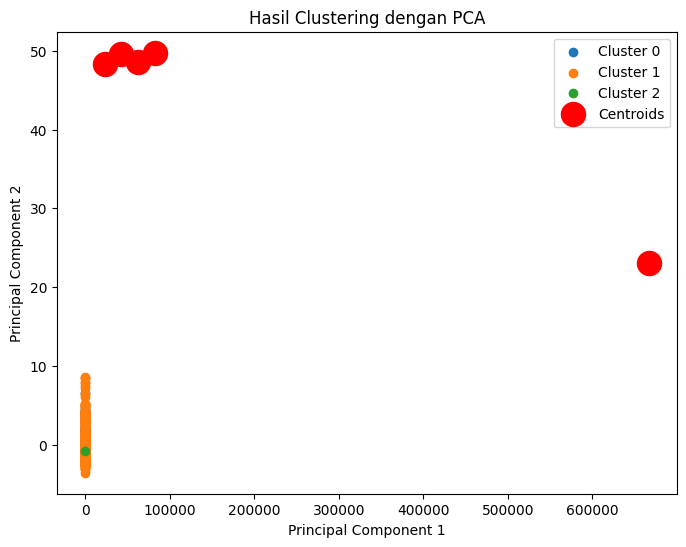

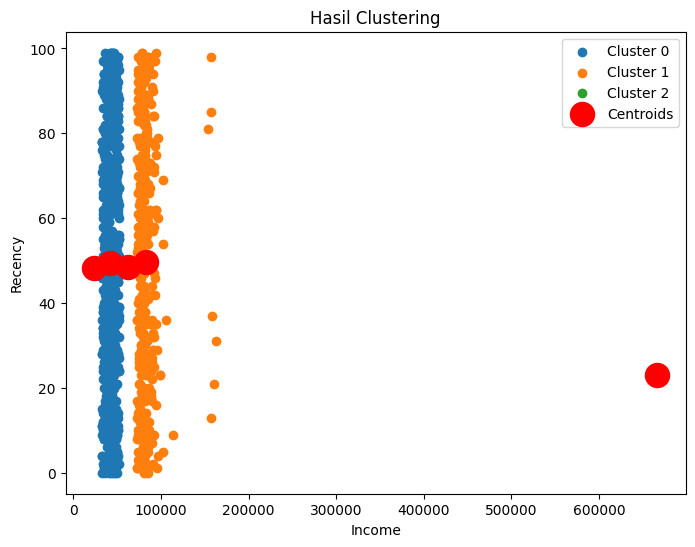

In [101]:
#Type your code here
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(optimal_n_clusters):
    plt.scatter(X_pca[data_v1['cluster'] == i, 0], X_pca[data_v1['cluster'] == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Hasil Clustering dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualisasi dengan scatter plot (jika hanya 2 fitur)

# Contoh visualisasi dengan dua fitur pertama (ganti dengan fitur yang relevan)
plt.figure(figsize=(8, 6))
for i in range(optimal_n_clusters):
  # Use .loc for boolean indexing and then .iloc to select columns
  plt.scatter(X.loc[data_v1['cluster'] == i, X.columns[0]],
              X.loc[data_v1['cluster'] == i, X.columns[1]],
              label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Hasil Clustering')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [98]:
#Type your code here
# Analisis karakteristik setiap cluster
for i in range(optimal_n_clusters):
    print(f"Karakteristik Cluster {i}:")
    cluster_data = data_v1[data_v1['cluster'] == i]
    print(cluster_data.describe())  # Statistik deskriptif untuk setiap fitur
    print("\n")

# Interpretasi hasil clustering (contoh)
# Berdasarkan statistik deskriptif dan visualisasi sebelumnya,
# kita dapat memberikan interpretasi untuk setiap cluster.

# Contoh Interpretasi:
print("Interpretasi Hasil Clustering:")
print("Cluster 0: Pelanggan dengan pendapatan menengah, tingkat pembelian produk sedang, dan responsif terhadap kampanye pemasaran")
print("Cluster 1: Pelanggan dengan pendapatan tinggi, pembeli produk yang aktif dan loyal, dan cenderung tidak merespons kampanye pemasaran")
print("Cluster 2: Pelanggan dengan pendapatan rendah, frekuensi pembelian yang rendah, dan memiliki kemungkinan lebih tinggi untuk mengeluh")


Tulis hasil interpretasinya di sini.
1. Cluster 1: Pelanggan dengan pendapatan menengah, tingkat pembelian produk sedang, dan responsif terhadap kampanye pemasaran
2. Cluster 2: Pelanggan dengan pendapatan tinggi, pembeli produk yang aktif dan loyal, dan cenderung tidak merespons kampanye pemasaran
3. Cluster 3: Pelanggan dengan pendapatan rendah, frekuensi pembelian yang rendah, dan memiliki kemungkinan lebih tinggi untuk mengeluh

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [102]:
# Simpan hasil clustering ke dalam file CSV
data_v1.to_csv('clustering_results.csv', index=False)
print("Hasil clustering telah disimpan ke dalam file clustering_results.csv")

Hasil clustering telah disimpan ke dalam file clustering_results.csv
